# TIME ANIMATION GIF

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import shp file as GEOdataframe
fp = '/Users/pietroaluffi/Documents/time_animation/ProvCM01012018/ProvCM01012018_WGS84.shp' 
map_df = gpd.read_file(fp)
#map_df.plot(figsize=(40,20))

In [3]:
#import raw data from github
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv')

In [4]:
#create merged GEOdataframe (map+data)
merged = map_df.set_index('SIGLA').join(df.set_index('sigla_provincia'))

In [16]:
#format time period
days = merged['data'].dropna().unique()

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


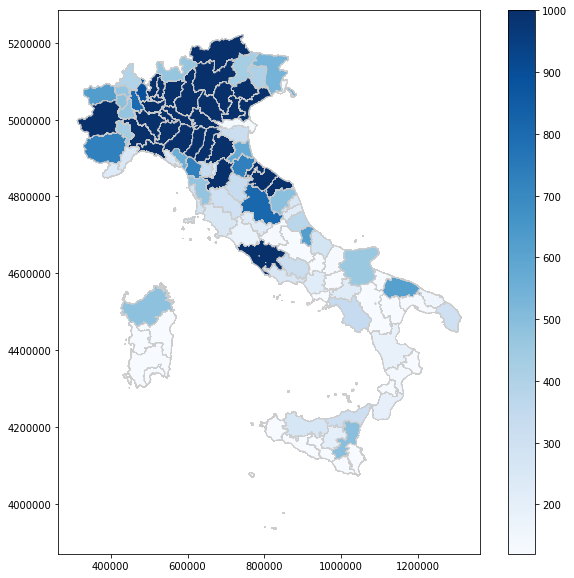

In [8]:
merged.plot(column='totale_casi', cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=120, vmax=1000,
legend=True, norm=plt.Normalize(vmin=120, vmax=1000))

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.p

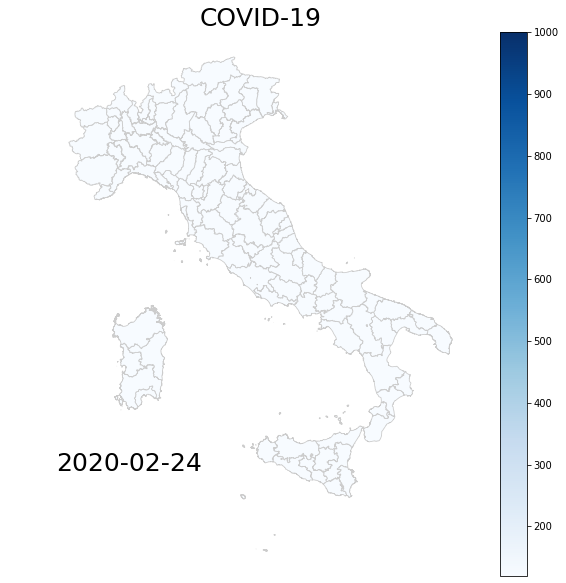

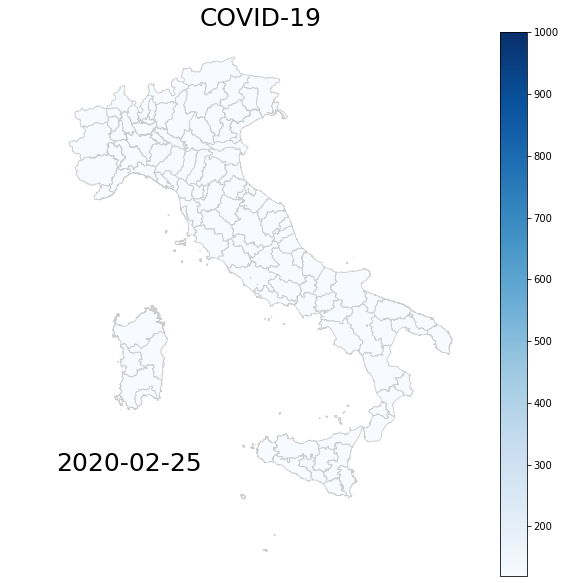

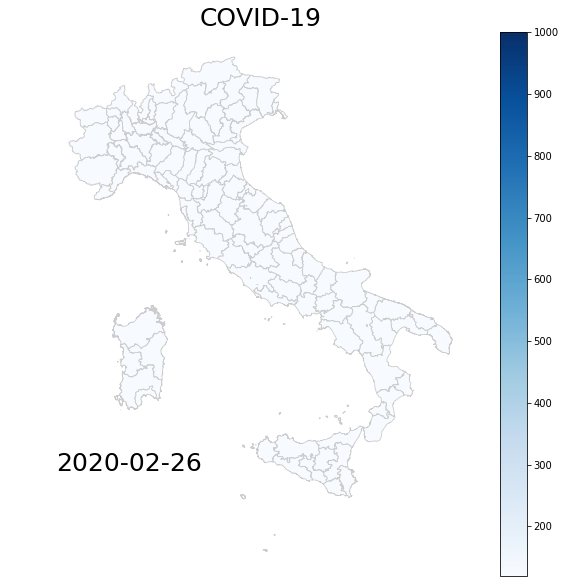

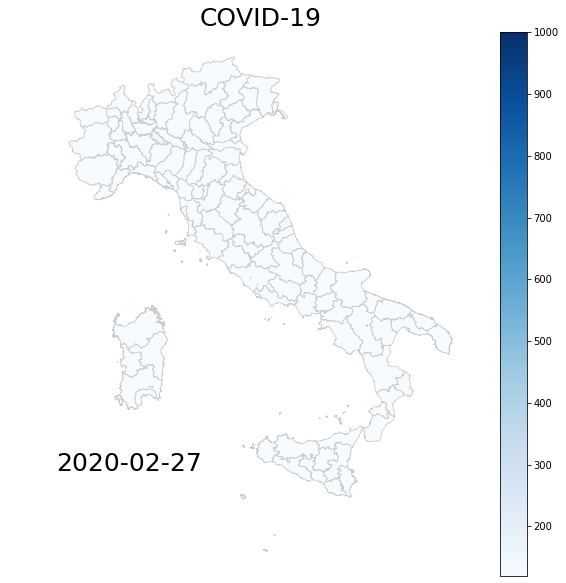

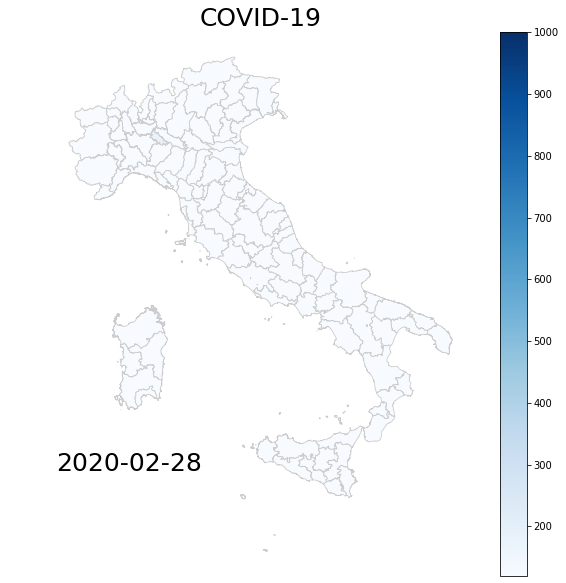

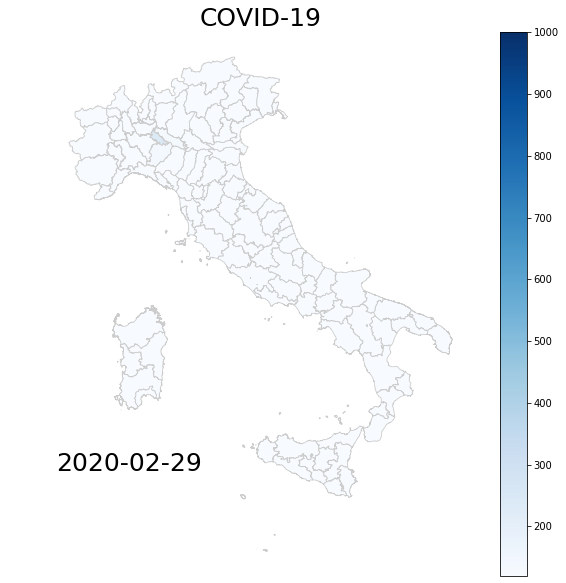

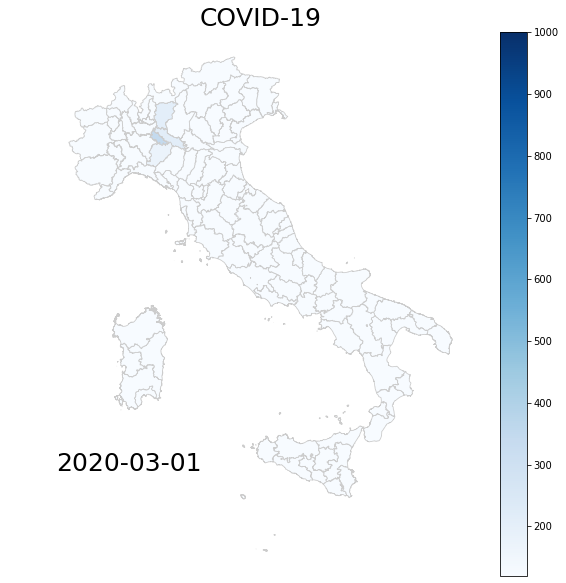

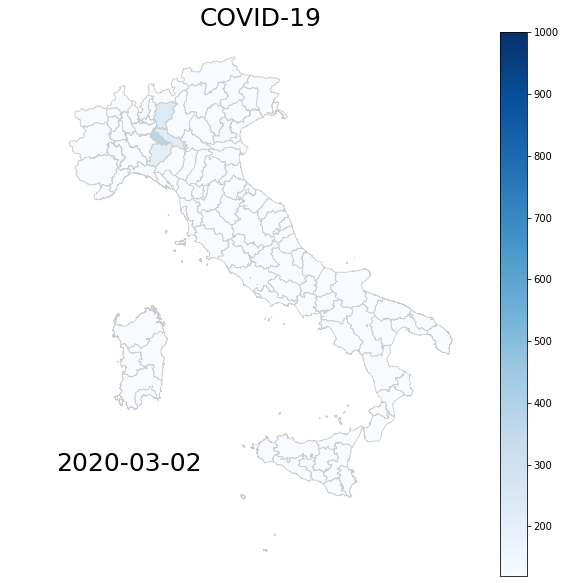

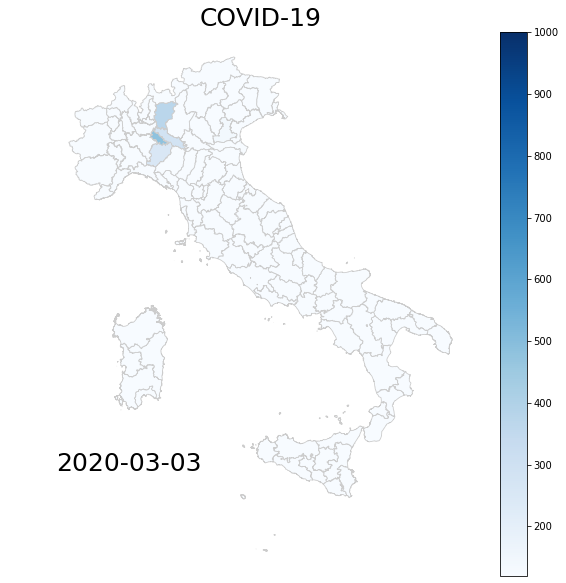

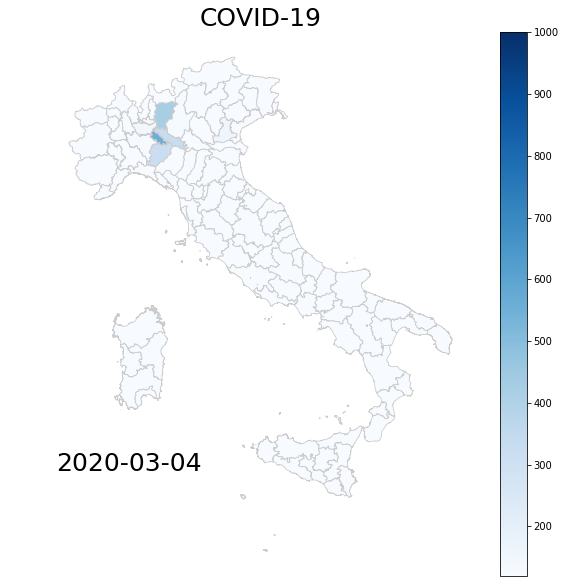

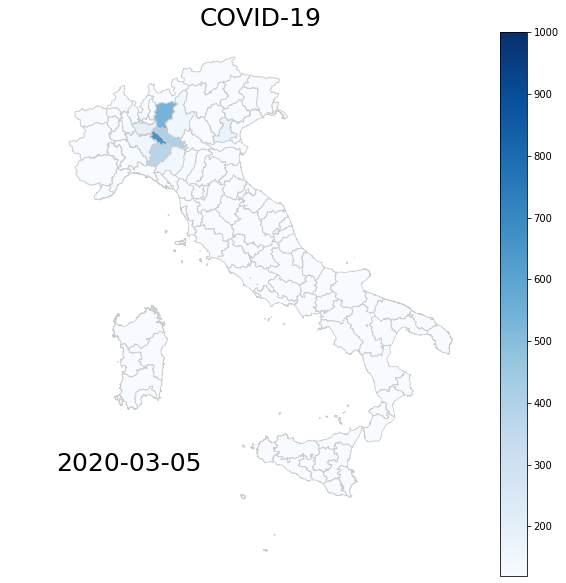

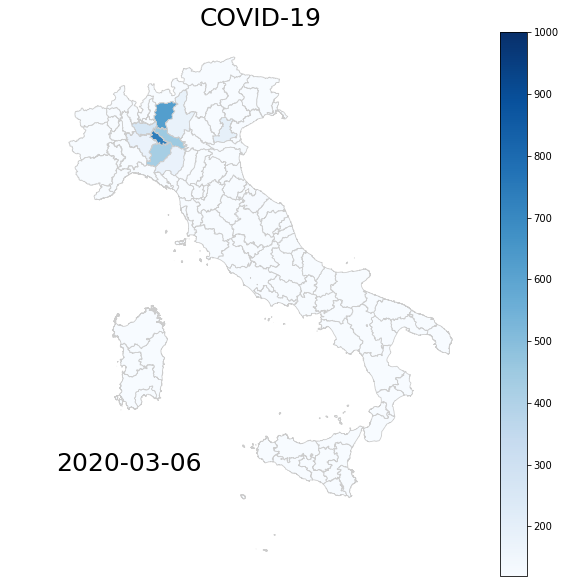

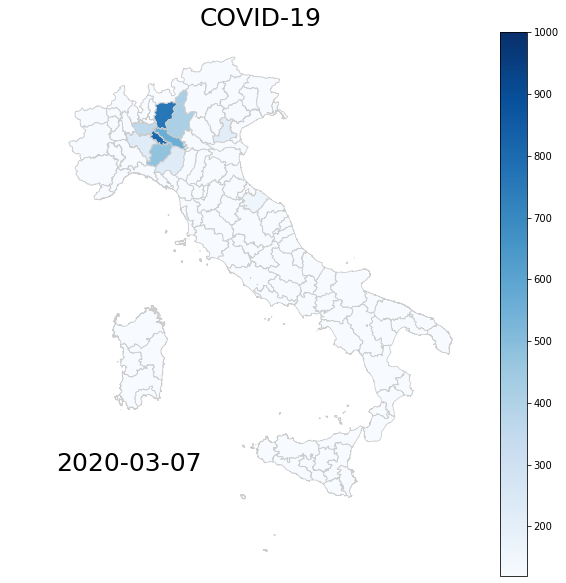

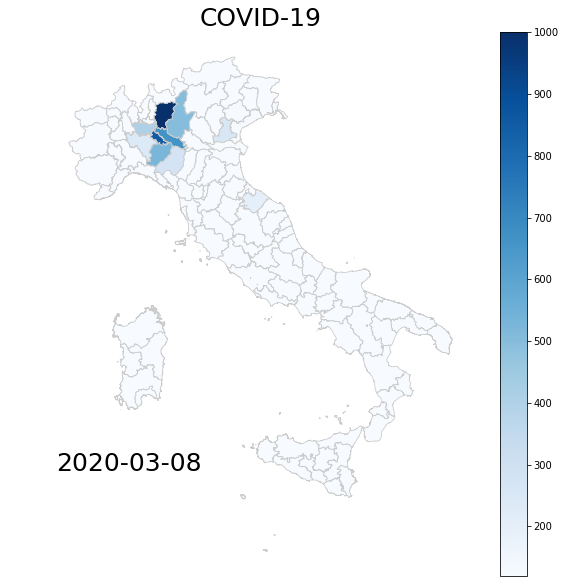

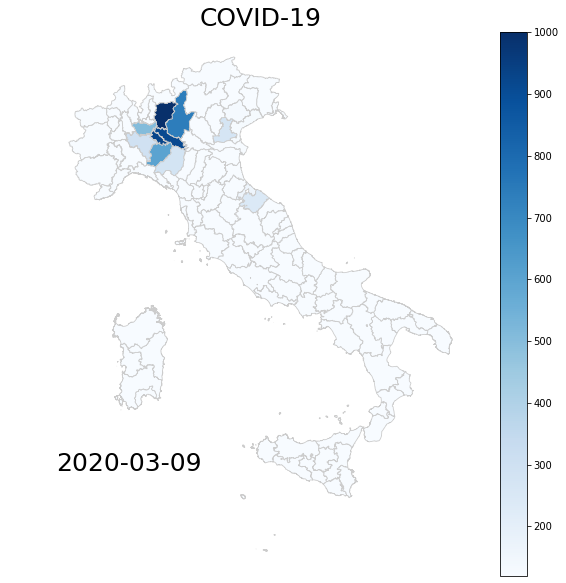

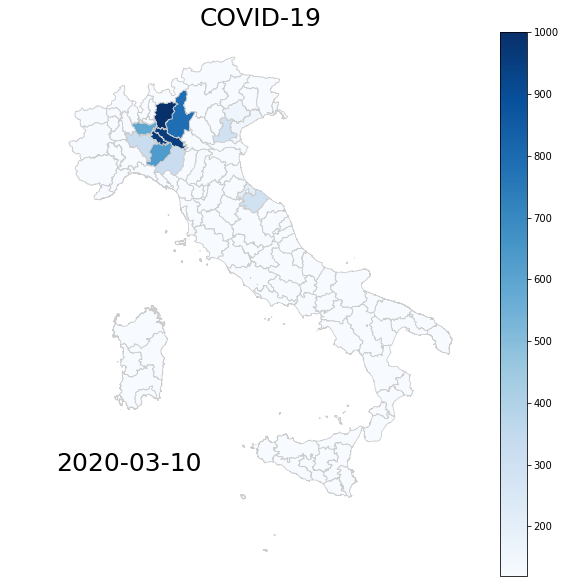

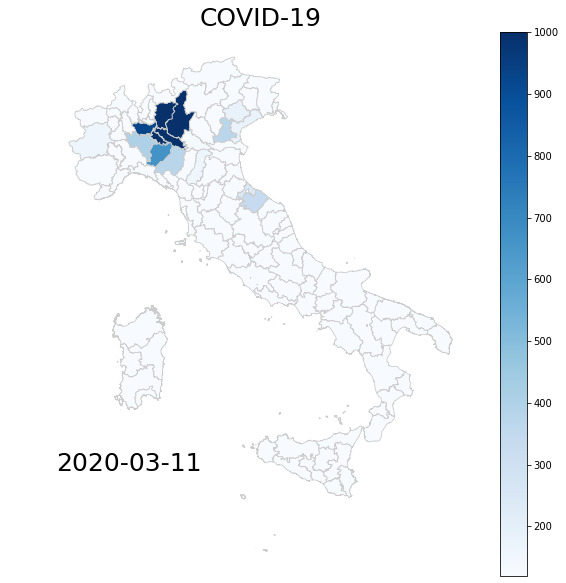

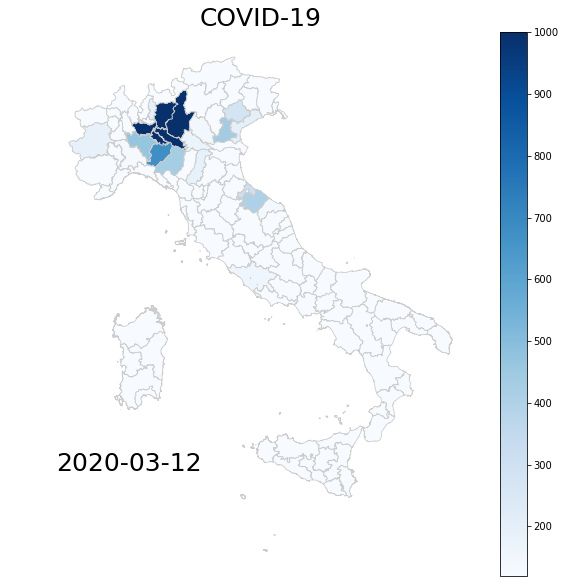

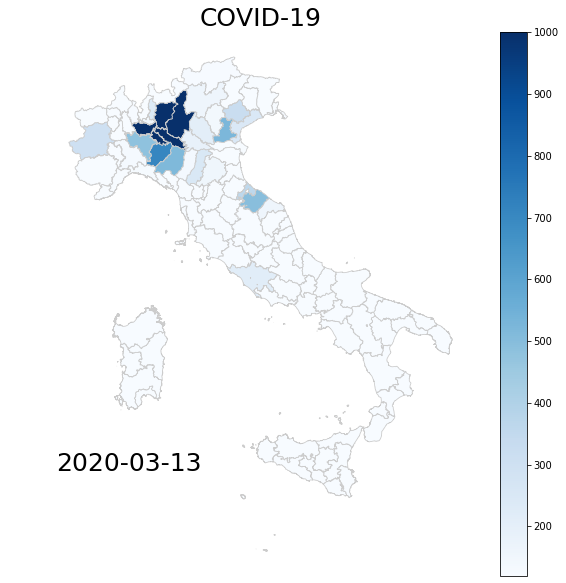

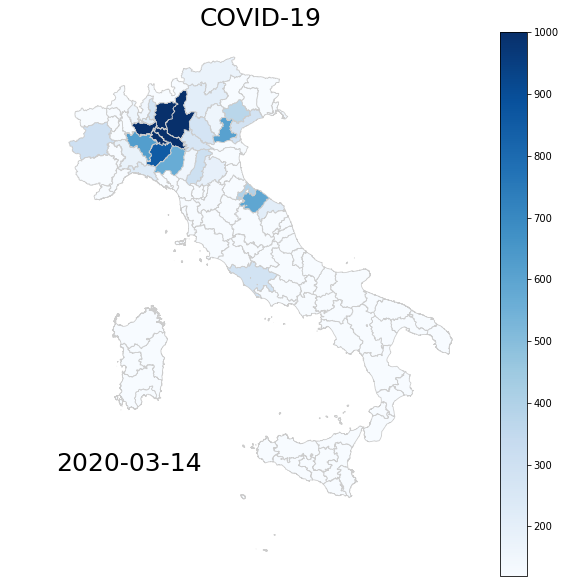

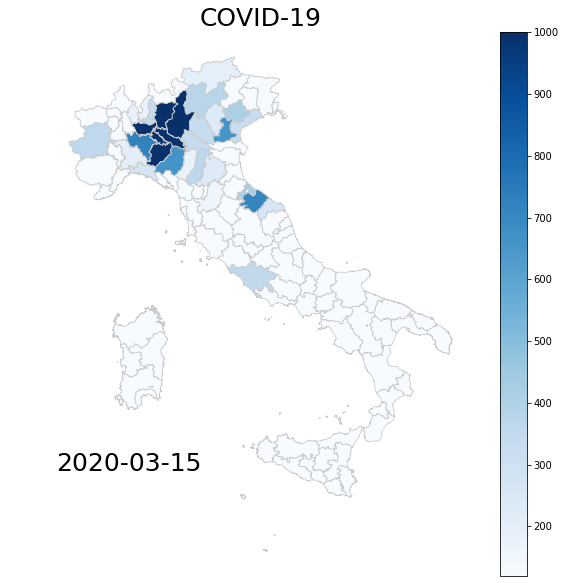

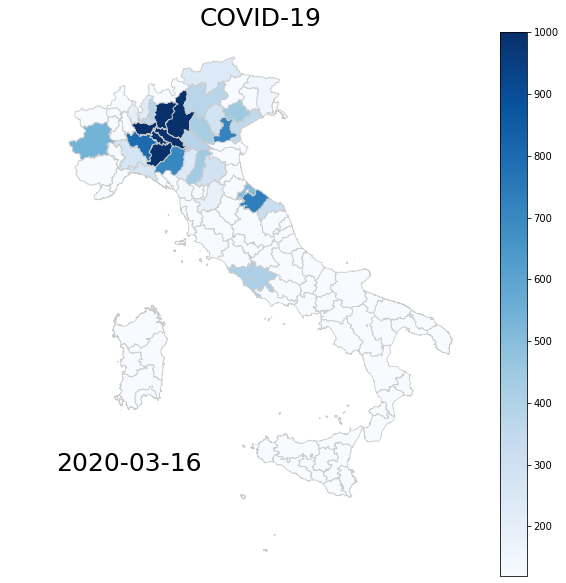

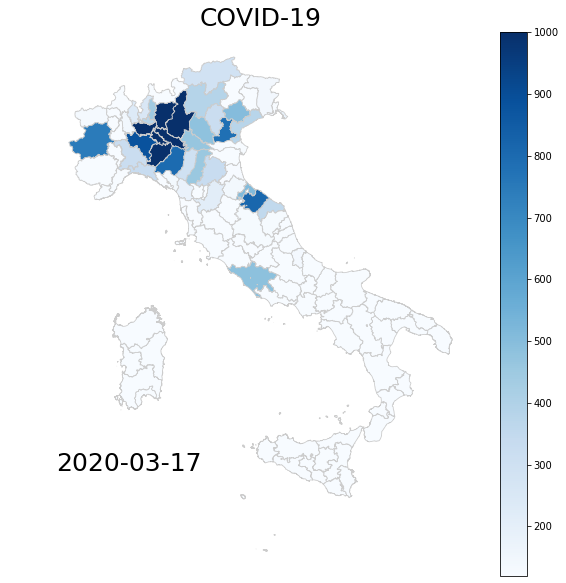

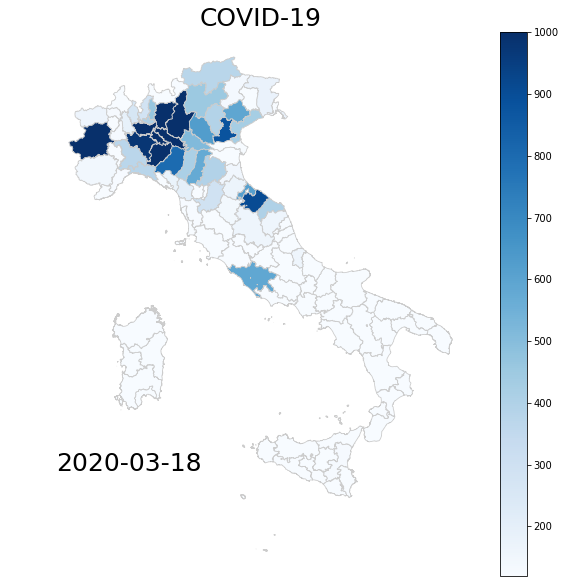

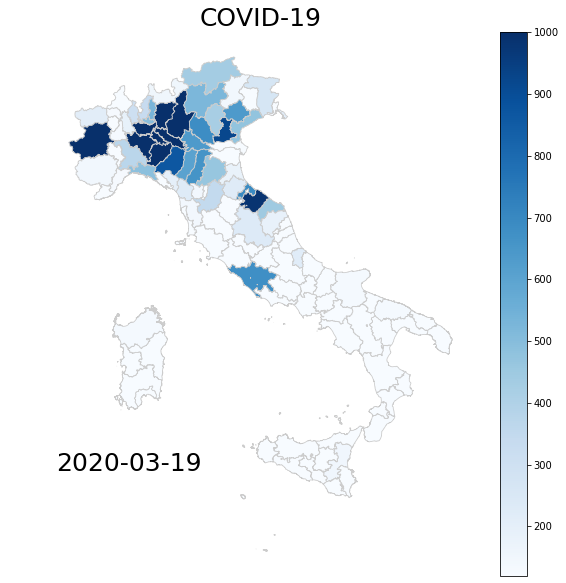

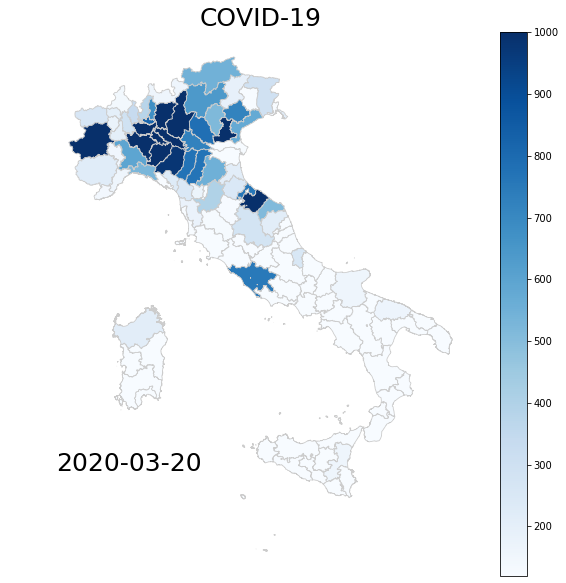

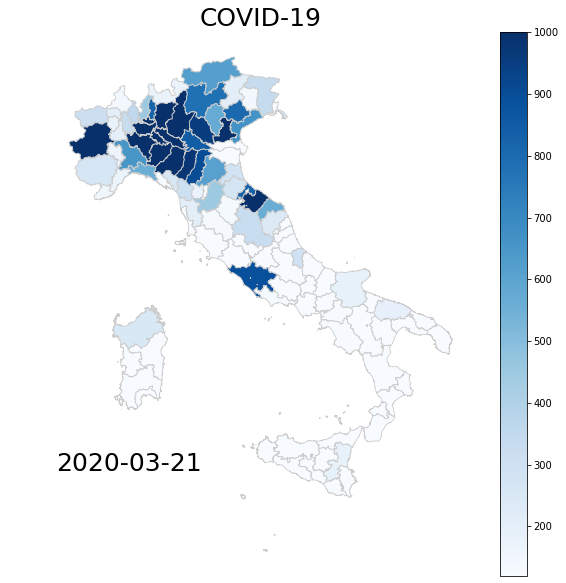

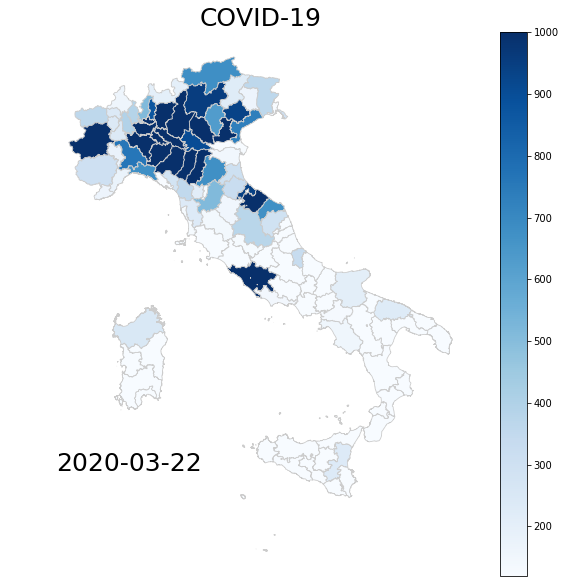

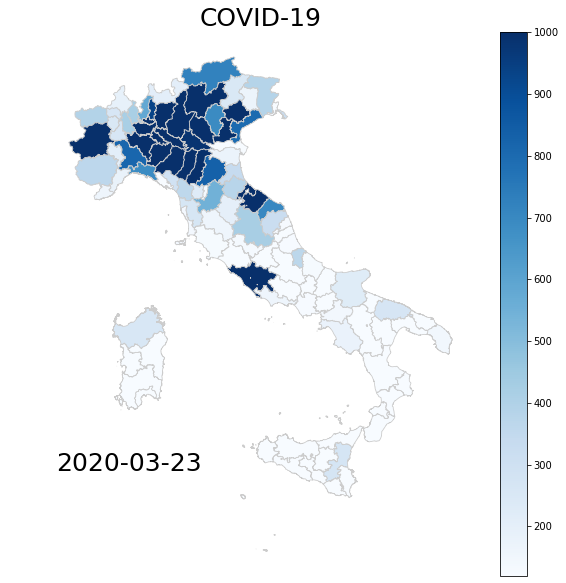

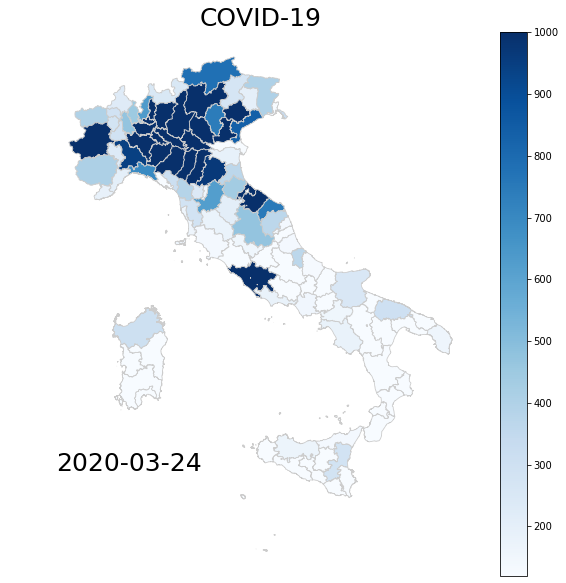

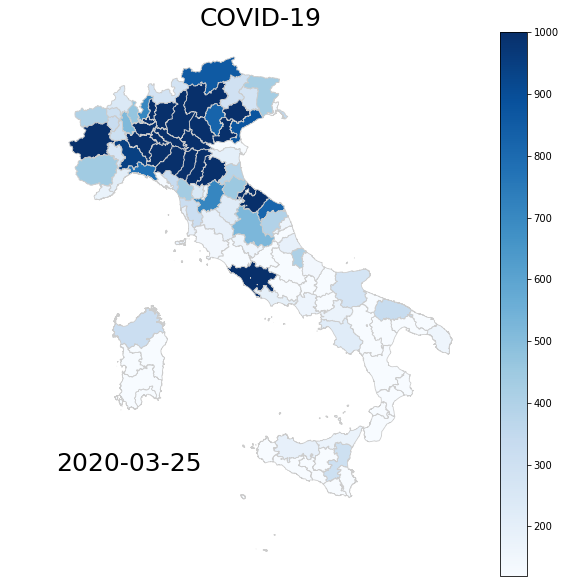

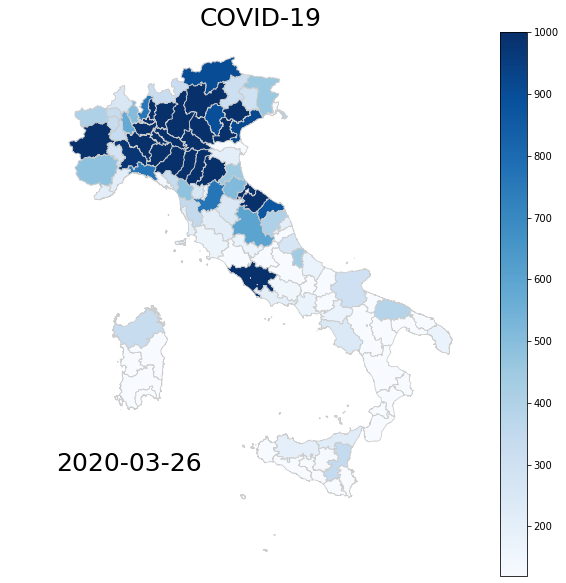

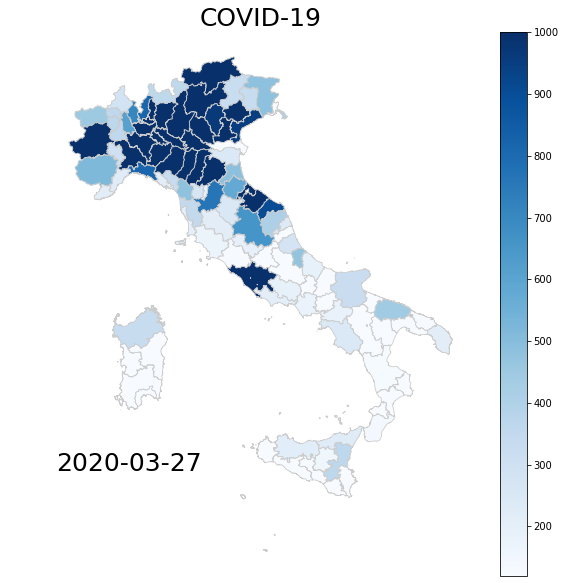

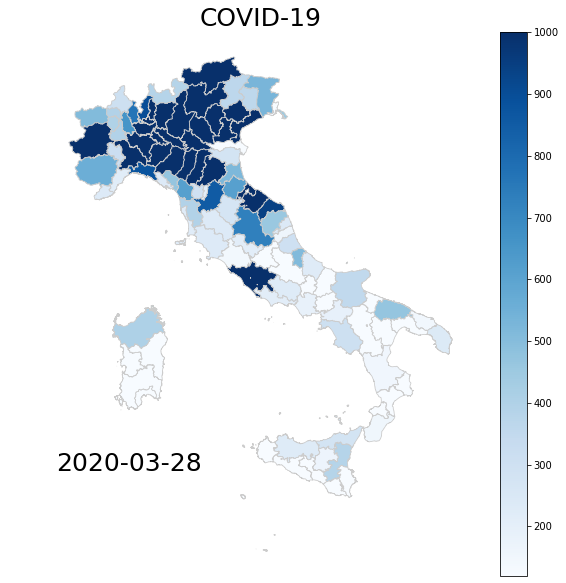

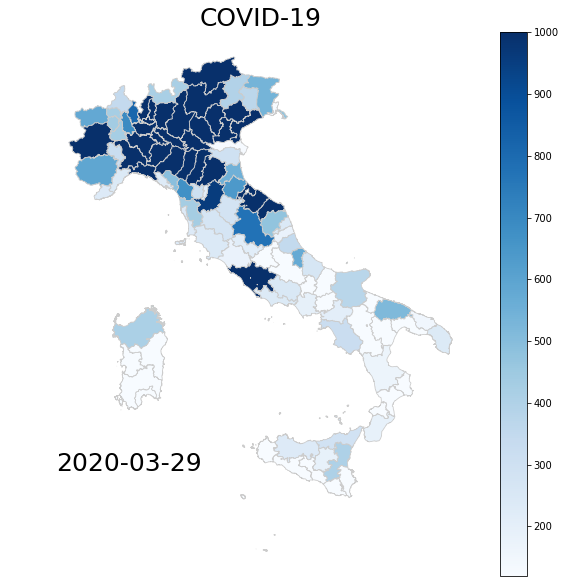

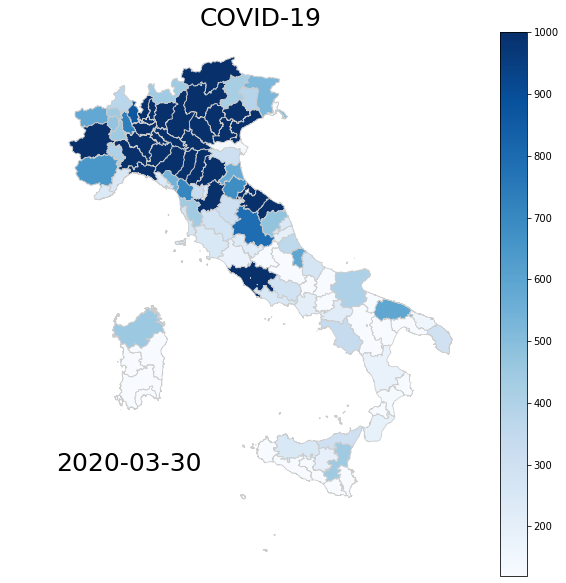

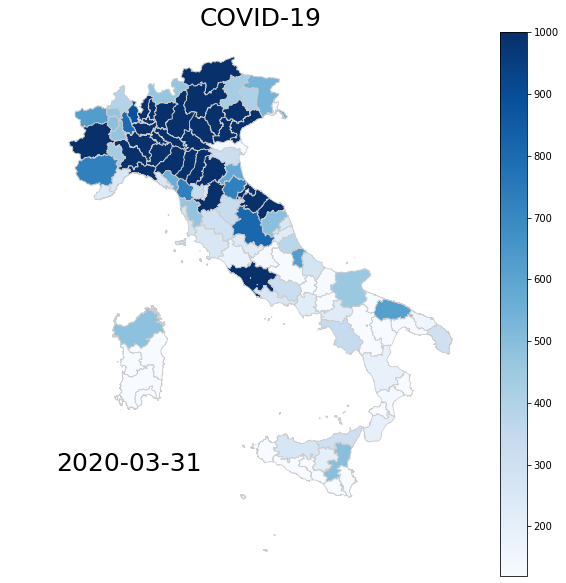

In [20]:
# start the for loop to create one map per year
output_path = '/Users/pietroaluffi/Documents/time_animation/maps'
for day in days:
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = merged[merged['data'] == day].plot(column='totale_casi', cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=120, vmax=1000,
legend=True, norm=plt.Normalize(vmin=120, vmax=1000))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('COVID-19', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # position the annotation to the bottom left
    fig.annotate(day[:10], 
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
#     filepath = os.path.join(output_path, day+'_covid.jpg')
#     chart = fig.get_figure()
#     chart.savefig(filepath, dpi=300)



In [ ]:
'''
create gif in terminal:

convert -delay 60 -loop 0 (jpn files)


new_map_normal.gif
'''